###### Analysing housing rent prices using 3 datasets. The datasets were extracted from the CMHC websit they are housing price indicaters, household average income and average price for 2 bedroom apartments.

There is still a lot of work to be done on this project, but for the most part the the infprmation below will give you a good grasp of datasets.

Susiette Adams 3030594

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas import read_table
from scipy.stats import norm
%matplotlib inline

In [2]:
# Importing the Renter Household data
rent= pd.read_csv(r"C:\\Users\\susie\\Documents\\Data Science\\Capstone data\\Average price 2 bedrooms.csv"
                   ,encoding="latin")
rent.head(5)

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,St. JohnÕs,566.0,554.0,559.0,565.0,570.0,567.0,513.0,517.0,552.0,...,614.0,630.0,677.0,725.0,771.0,798.0,864.0,888.0,923.0,958.0
1,Halifax,595.0,604.0,610.0,615.0,617.0,616.0,631.0,637.0,648.0,...,815.0,833.0,877.0,891.0,925.0,954.0,976.0,1005.0,1048.0,1063.0
2,Moncton,469.0,479.0,495.0,504.0,513.0,523.0,531.0,538.0,560.0,...,643.0,656.0,675.0,691.0,715.0,731.0,742.0,762.0,760.0,798.0
3,Saint John,429.0,436.0,439.0,437.0,441.0,449.0,452.0,457.0,460.0,...,570.0,618.0,644.0,645.0,670.0,691.0,691.0,714.0,718.0,720.0
4,Saguenay,420.0,419.0,416.0,417.0,423.0,425.0,428.0,428.0,438.0,...,490.0,518.0,518.0,535.0,557.0,549.0,571.0,595.0,598.0,587.0


### Finding the to 10 hightest and lowest rent prices for 2 bedroom apartments.


In [3]:
# Using the n.largest I will search the data to find the highest prices for 2 bedroom apartments.
lrg = rent.nlargest(10, ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
lrg

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
31,Vancouver,771.0,790.0,812.0,826.0,845.0,852.0,870.0,864.0,890.0,...,1084.0,1124.0,1169.0,1195.0,1237.0,1261.0,1281.0,1311.0,1368.0,1450.0
13,Toronto,754.0,773.0,784.0,805.0,819.0,821.0,881.0,916.0,979.0,...,1061.0,1095.0,1096.0,1123.0,1149.0,1183.0,1213.0,1251.0,1288.0,1327.0
9,Ottawa,700.0,727.0,738.0,738.0,739.0,729.0,754.0,783.0,877.0,...,961.0,995.0,1028.0,1048.0,1086.0,1115.0,1132.0,1132.0,1174.0,1201.0
32,Victoria,684.0,703.0,713.0,715.0,717.0,724.0,722.0,728.0,731.0,...,907.0,965.0,1001.0,1024.0,1045.0,1059.0,1068.0,1095.0,1128.0,1188.0
21,Barrie,653.0,670.0,687.0,712.0,713.0,737.0,774.0,788.0,830.0,...,934.0,954.0,961.0,968.0,1001.0,1037.0,1048.0,1118.0,1167.0,1150.0
12,Oshawa,651.0,659.0,659.0,689.0,700.0,691.0,726.0,745.0,778.0,...,877.0,889.0,900.0,903.0,941.0,939.0,985.0,1010.0,1035.0,1109.0
23,Thunder Bay,620.0,632.0,655.0,659.0,672.0,666.0,647.0,647.0,654.0,...,709.0,719.0,742.0,763.0,772.0,818.0,858.0,888.0,917.0,940.0
20,Windsor,620.0,631.0,643.0,667.0,682.0,680.0,680.0,696.0,736.0,...,773.0,772.0,747.0,752.0,753.0,778.0,788.0,798.0,824.0,852.0
18,Guelph,618.0,626.0,642.0,642.0,658.0,678.0,686.0,702.0,736.0,...,848.0,869.0,874.0,887.0,903.0,941.0,957.0,988.0,1027.0,1078.0
30,Abbotsford-Mission,615.0,635.0,640.0,651.0,645.0,628.0,633.0,630.0,632.0,...,752.0,765.0,781.0,785.0,800.0,818.0,820.0,835.0,864.0,915.0


In [4]:
# The outputs above shows the 10 least exensive cities to rent apartments. 

# Here we are filtering the rent dataset to find the top 10 least expensive cities

In [5]:
# The .nsmallest was used t get the cities with the lowest prices for 2 bedroom apartments
sml = rent.nsmallest(10, ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
sml

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
6,Trois-Rivires,395.0,400.0,402.0,406.0,405.0,406.0,411.0,403.0,413.0,...,487.0,505.0,520.0,533.0,547.0,550.0,555.0,568.0,581.0,587.0
5,Sherbrooke,408.0,418.0,420.0,422.0,426.0,426.0,433.0,434.0,437.0,...,529.0,543.0,553.0,566.0,577.0,578.0,591.0,604.0,608.0,622.0
4,Saguenay,420.0,419.0,416.0,417.0,423.0,425.0,428.0,428.0,438.0,...,490.0,518.0,518.0,535.0,557.0,549.0,571.0,595.0,598.0,587.0
3,Saint John,429.0,436.0,439.0,437.0,441.0,449.0,452.0,457.0,460.0,...,570.0,618.0,644.0,645.0,670.0,691.0,691.0,714.0,718.0,720.0
26,Saskatoon,444.0,449.0,452.0,460.0,479.0,500.0,516.0,529.0,541.0,...,693.0,841.0,905.0,934.0,966.0,1002.0,1041.0,1091.0,1087.0,1100.0
2,Moncton,469.0,479.0,495.0,504.0,513.0,523.0,531.0,538.0,560.0,...,643.0,656.0,675.0,691.0,715.0,731.0,742.0,762.0,760.0,798.0
25,Regina,484.0,487.0,485.0,487.0,494.0,512.0,525.0,547.0,549.0,...,661.0,756.0,832.0,881.0,932.0,979.0,1018.0,1079.0,1097.0,1109.0
7,Montral,488.0,484.0,484.0,494.0,491.0,491.0,499.0,506.0,509.0,...,647.0,659.0,669.0,700.0,719.0,711.0,730.0,739.0,760.0,791.0
8,Gatineau,513.0,519.0,528.0,536.0,537.0,530.0,529.0,534.0,544.0,...,662.0,677.0,690.0,711.0,731.0,743.0,744.0,750.0,751.0,762.0
17,Brantford,541.0,572.0,593.0,606.0,610.0,612.0,617.0,614.0,639.0,...,749.0,752.0,754.0,778.0,792.0,838.0,835.0,855.0,870.0,908.0


In [6]:
# # Above we have the top 10 cities with the highest rent prices.
# Theses are the cities and price we are going to focus on the reason being we are trying to find the best livable cities.

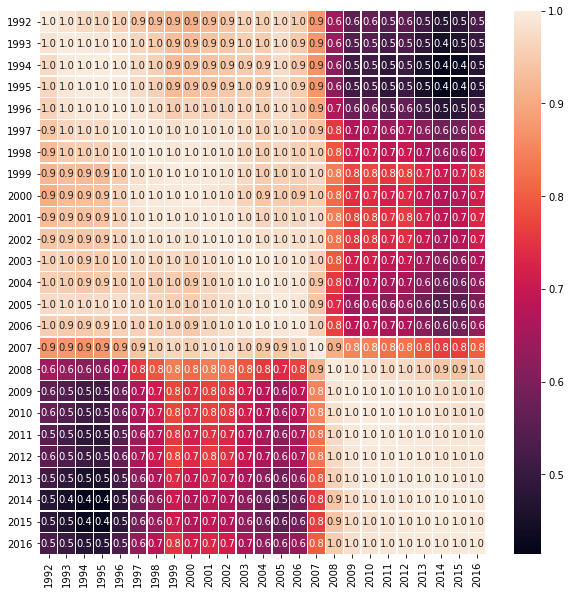

In [7]:
# Plotting a correlation heatmap to get a better visual on the correlated variables
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(sml.corr(), annot = True,linewidths=.4, fmt='.1f', ax=ax)
plt.show()

In [8]:
# What this allows us to do is quickly see which features have the most significant (positive) correlations, and 
# also see which features are unlikely to be relevant. 
#In the top 10 least expensive cites 2001,2002, and 1999 appears to have the strongest correlation in the data.

In [9]:
#Renaming 2001 column name
sml.rename(columns={'2001': 'price1'}, inplace=True)


In [10]:
#Renaming 2002 column name
sml.rename(columns={'2002': 'price2'}, inplace=True)

In [11]:
#Renaming 1999 column name
sml.rename(columns={'1999': 'price99'}, inplace=True)

In [85]:
#Renaming 1998 column name
sml.rename(columns={'1998': 'price98'}, inplace=True)

In [86]:
#Renaming 2000 column name
sml.rename(columns={'2000': 'price00'}, inplace=True)

In [213]:
#Renaming 2001 column name
sml.rename(columns={'2016': 'price16'}, inplace=True)

In [87]:
# I have renaemd the columns above because I have choose the will be using these columns to do my predictions.

In [88]:
#Show the top 10 feature which have strongest correlation 
corr_rent = sml.corr().price1
corr_field = corr_rent.sort_values(ascending = False).head(10)
corr_field

price1     1.000000
price99    0.996648
price2     0.996460
price98    0.993183
price00    0.992566
1997       0.987943
2003       0.982119
2007       0.975144
2005       0.969059
2006       0.968000
Name: price1, dtype: float64


 mu = 522.90 and sigma = 70.38



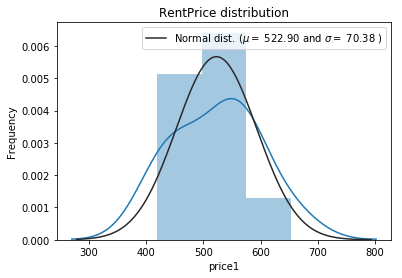

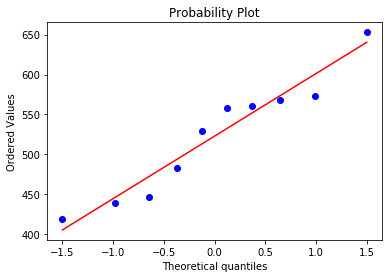

In [15]:
## let's do some analysis on this variable first.
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(sml['price1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(sml['price1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RentPrice distribution')

fig = plt.figure()
res = stats.probplot(sml['price1'], plot=plt)
plt.show()

In [16]:
#skewness and kurtosis
print("Skewness: %f" % sml['price1'].skew())
print("Kurtosis: %f" % sml['price1'].kurt())

Skewness: 0.097921
Kurtosis: -0.706407


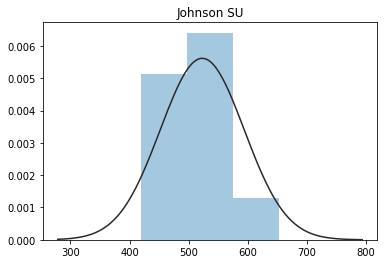

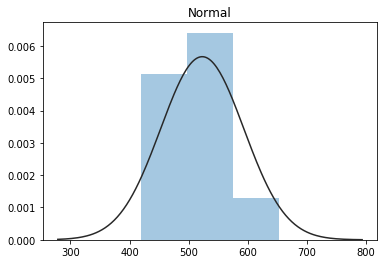

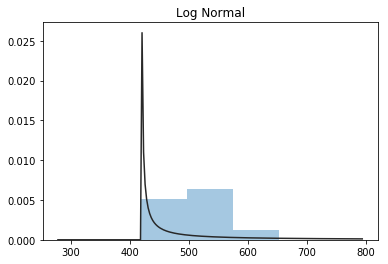

In [17]:
#  Johnson Su distribution plot for 2005

import scipy.stats as st
y = sml[['price1']]
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

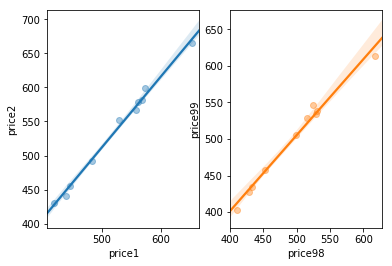

In [124]:
# Regression plot
fig, ax = plt.subplots(1,2)
sns.regplot('price1','price2',sml, ax=ax[0], scatter_kws={'alpha':0.4})
sns.regplot('price98','price99',sml,ax=ax[1], scatter_kws={'alpha':0.4})



Text(0, 0.5, 'residuals')

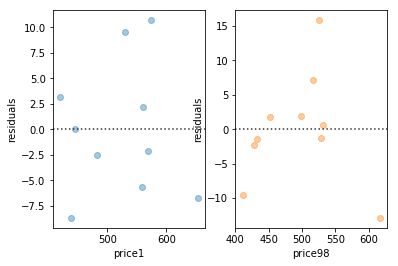

In [112]:
# visualizing the residuals by creating residual plots .
fig, ax = plt.subplots(1,2)
ax[0]= sns.residplot('price1','price2', sml,ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('residuals')
ax[1]=sns.residplot('price98','price99',sml,ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('residuals')

In [259]:
# # Next we’ll want to fit a linear model.Create a fitted model.
import statsmodels.formula.api as smf
model = smf.ols(formula='price1 ~ price2', data=sml).fit()

# print the coefficients
lm1.params

Intercept    12.191914
price2        0.952636
dtype: float64

In [260]:
# The P valus represents the probability that the coefficient is actually zero
#print the p-values for the model coefficients
lm1.pvalues

Intercept    4.506910e-01
price2       6.838871e-10
dtype: float64

In [232]:
# print the R-squared value for the model
lm1.rsquared

0.9907773400504103

In [238]:
# create a fitted model with all three features
lm2 = smf.ols(formula='price1 ~ price2 + price98 + price99', data=sml).fit()

# print the coefficients
lm2.params


Intercept   -18.816983
price2        0.440564
price98       0.169263
price99       0.444685
dtype: float64

##### Building 3 more models different.

In [113]:
# We need to choose variables that we think we’ll be good predictors for the dependent variable.
# This can be done by checking the correlations between variables, on what variables are good predictors of y.

import statsmodels.api as sm
X = sml["price1"]
y = sml["price2"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

In [116]:
# # Next we’ll want to fit a linear regression model by adding a constant. 
X = sml["price98"] ## X usually means our input variables (or independent variables)
y = sml["price99"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model2.predict(X)

In [125]:
# set input and output variables to use in regression model
x = sml[['price2', 'price98', 'price99','price00']]
y = sml['price1']

# add intercept to input variable
x = sm.add_constant(x)

# fit regression model, using statsmodels GLM uses a different method but gives the same results
#model = sm.GLM(y, x, family=sm.families.Gaussian()).fit()
model3 = sm.OLS(y, x).fit()

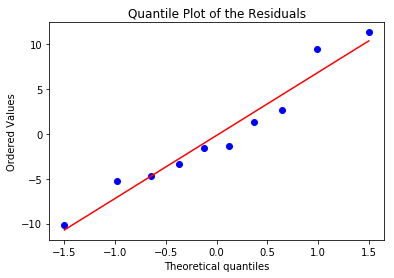

In [136]:
import pylab
# quantile plot of residuals
stats.probplot(model.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals');

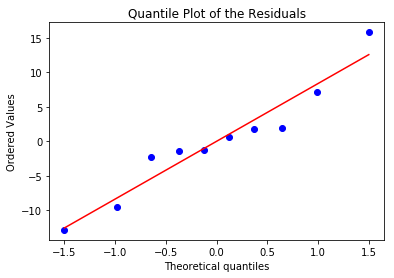

In [137]:
# quantile plot of residuals
stats.probplot(model2.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals');

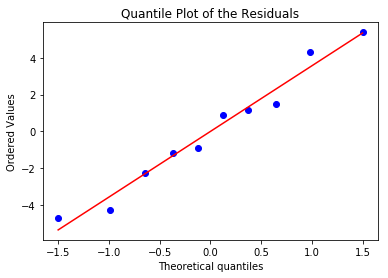

In [138]:
import pylab
# quantile plot of residuals
stats.probplot(model3.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals');

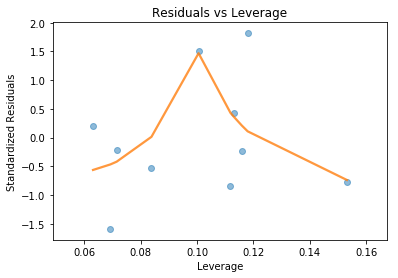

In [142]:
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'C1', 'alpha': 0.8})
_ = plt.title('Residuals vs Leverage')
_ = plt.xlabel('Leverage')
_ = plt.ylabel('Standardized Residuals');

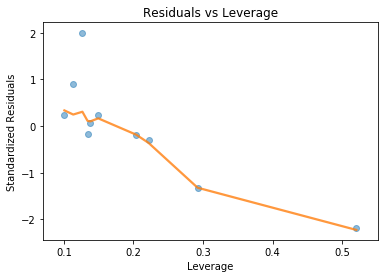

In [143]:
# normalized residuals
model_norm_residuals = model2.get_influence().resid_studentized_internal

# leverage, from statsmodels internals
model_leverage = model2.get_influence().hat_matrix_diag

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'C1', 'alpha': 0.8})

_ = plt.title('Residuals vs Leverage')
_ = plt.xlabel('Leverage')
_ = plt.ylabel('Standardized Residuals');

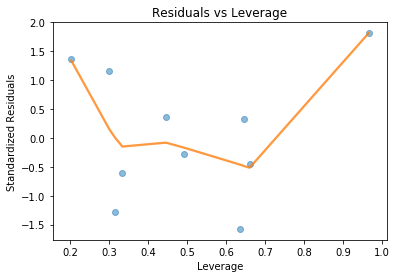

In [139]:
# normalized residuals
model_norm_residuals = model3.get_influence().resid_studentized_internal
# leverage, from statsmodels internals
model_leverage = model3.get_influence().hat_matrix_diag
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'C1', 'alpha': 0.8})
_ = plt.title('Residuals vs Leverage')
_ = plt.xlabel('Leverage')
_ = plt.ylabel('Standardized Residuals');


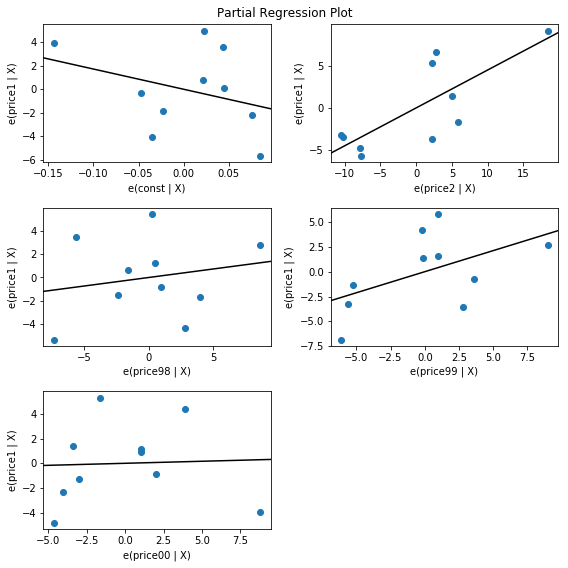

In [126]:
# model3 variable plots
fig = plt.figure(figsize=(8,8))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)


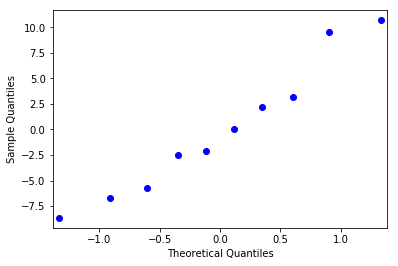

In [75]:
# qqplot of the residuals against quantiles of t-distribution with 4 degrees of freedom:

import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model.resid # residuals
fig = sm.qqplot(res)
plt.show()

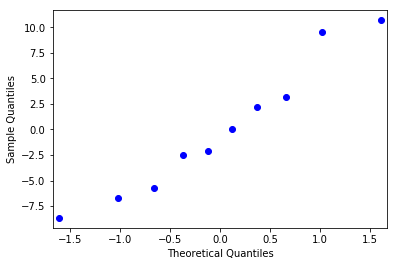

In [76]:
#qqplot of the residuals against quantiles of t-distribution with 4 degrees of freedom:
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(4,))
plt.show()

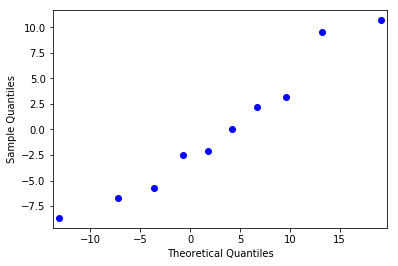

In [77]:
# qqplot against same as above, but with mean 3 and std 10:

fig = sm.qqplot(res, stats.t, distargs=(4,), loc=3, scale=10)
plt.show()

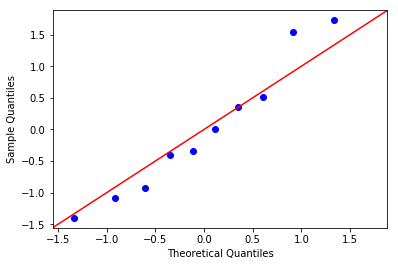

In [78]:
#Automatically determine parameters for t distribution including the loc and scale:

fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

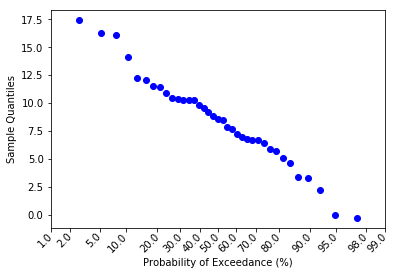

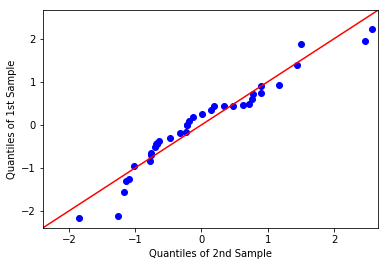

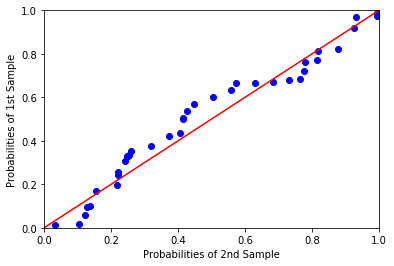

In [79]:
# ProbPlot class
x = np.random.normal(loc=8.25, scale=3.5, size=37)
y = np.random.normal(loc=8.00, scale=3.25, size=37)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)

# probability of exceedance
fig2 = pp_x.probplot(exceed=True)

# compare x quantiles to y quantiles
fig3 = pp_x.qqplot(other=pp_y, line='45')

# same as above with probabilities/percentiles
fig4 = pp_x.ppplot(other=pp_y, line='45')


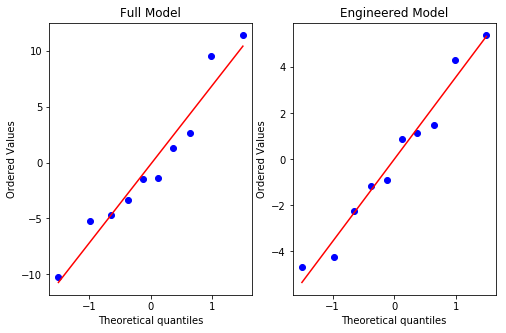

In [150]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
stats.probplot(model.resid, plot=pylab)
_ = plt.title('Full Model');

plt.subplot(1, 2, 2)
stats.probplot(model3.resid, plot=pylab)
_ = plt.title('Engineered Model');

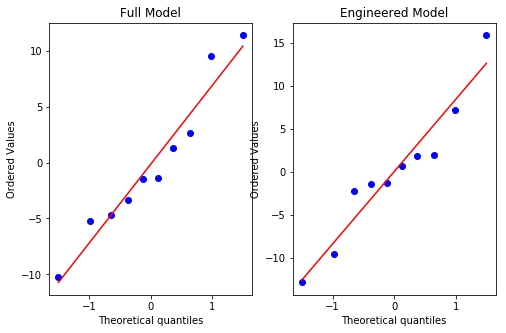

In [151]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
stats.probplot(model.resid, plot=pylab)
_ = plt.title('Full Model');

plt.subplot(1, 2, 2)
stats.probplot(model2.resid, plot=pylab)
_ = plt.title('Engineered Model');

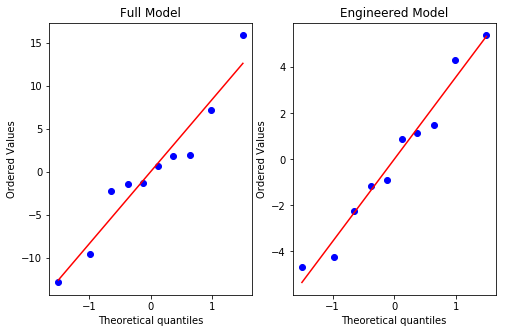

In [152]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
stats.probplot(model2.resid, plot=pylab)
_ = plt.title('Full Model');

plt.subplot(1, 2, 2)
stats.probplot(model3.resid, plot=pylab)
_ = plt.title('Engineered Model');

In [ ]:
# Attempting to handle the categorical variables
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(sml))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
sml['City'] = 'Brantford'

# set a seed for reproducibility

# Series.loc is a purely label-location based indexer for selection by label
sml.loc[mask_large, 'City'] = 'Sherbrooke'
sml.loc[mask_large, 'City'] = 'Trois-Rivires'
sml.loc[mask_large, 'City'] = 'Saint John'
sml.loc[mask_large, 'City'] = 'Saguenay'
sml.loc[mask_large, 'City'] = 'Saskatoon'
sml.loc[mask_large, 'City'] = 'Moncton'
sml.loc[mask_large, 'City'] = 'Regina'
sml.loc[mask_large, 'City'] = 'Montral'
sml.loc[mask_large, 'City'] = 'Gatineau'

sml.head()

In [ ]:
# create three dummy variables using get_dummies
pd.get_dummies(sml.City, prefix='City').head()

In [281]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1124.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           6.84e-10
Time:                        00:19:32   Log-Likelihood:                -31.966
No. Observations:                  10   AIC:                             67.93
Df Residuals:                       8   BIC:                             68.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1919     15.376      0.793      0.4

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
# OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that
# would minimize the square of distance from the regression line.

In [194]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                price99   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     540.3
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           1.25e-08
Time:                        13:43:37   Log-Likelihood:                -34.456
No. Observations:                  10   AIC:                             72.91
Df Residuals:                       8   BIC:                             73.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.1279     22.280     -0.679      0.5

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [195]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 price1   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     623.7
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           6.25e-07
Time:                        13:48:34   Log-Likelihood:                -25.656
No. Observations:                  10   AIC:                             61.31
Df Residuals:                       5   BIC:                             62.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.2774     21.621     -0.799      0.4

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [174]:
# Loading the income after tax dataset
income= pd.read_csv(r"C:\\Users\\susie\\Documents\\Data Science\\Capstone data\\Average income.csv"
                   ,encoding="latin1")


In [ ]:
income.head(5)

In [284]:
income.shape

(28, 13)

In [283]:
income.columns

Index(['Cities', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

# Finding the hightest and lowest income ranges for top 10 cities. 
For the income dataset we will be forcusing on the the cities with the highest income bracket


In [ ]:
# Filtering the data to find the cities with the lowest income


In [175]:
# Using the n.smallest I will search the data to find cities with the highest income.
low = income.nsmallest(10, ['2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'])
low

,Cities,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
5,Trois-Rivières,28700,36800,35800,36500,34800,34300,31300,34100,33600,31800,38500,36200
3,Saguenay,31600,33100,33800,34100,35400,38400,37000,38200,33000,35400,37800,35100
4,Sherbrooke,32900,34800,36100,35400,36600,34100,32600,35300,36200,41500,37700,35800
0,St John's,34400,33000,38000,38300,40000,42300,42900,48400,49500,48300,45700,43400
21,Regina,36000,44000,43700,44100,53400,51600,53300,53900,57600,53700,54600,53400
19,Thunder Bay,37100,38900,35000,39400,42800,36800,40500,39000,38800,45500,42800,44800
20,Winnipeg,37200,40400,38100,37600,39300,42900,42100,42800,43700,42400,44600,43700
17,Windsor,37700,38700,38500,34300,35600,34600,42100,35200,33500,32100,38200,32000
10,Kingston,37800,42800,44500,37800,37500,46500,47100,44800,43000,46900,46700,47200
2,Saint John,38600,41900,41700,43000,42500,40400,30200,43000,39400,39900,43200,40600


In [29]:
# Filtering the data to find the cities with the lowest income


In [176]:
# Using the n.largest I will search the data to find cities with the highest income.
high = income.nlargest(10, ['2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'])
high

,Cities,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
23,Calgary,58000,65800,71000,61800,61700,63200,67300,70000,66500,63900,63400,66700
24,Edmonton,50100,58400,56900,66800,65800,58600,57900,61800,67800,72200,66800,66200
25,Abbotsford,49200,44000,42100,47700,42500,47000,53100,44900,55300,46800,55400,53900
27,Victoria,47400,47300,47200,45300,38900,52900,45300,47000,45400,42700,54500,54900
26,Vancouver,46600,50600,47800,45800,49000,47300,54000,51100,51300,53000,54200,59300
9,Ottawa - Gatineau (Québec),46400,44800,42100,42200,38600,46600,37100,41800,37600,44400,44600,44200
15,Kitchener,45800,50800,46100,50800,42900,45100,40200,49800,46300,54000,54000,55800
12,Toronto,45600,45700,50200,51900,51100,46200,47900,49200,53300,55500,55900,59800
7,Ottawa - Gatineau,45400,48100,49100,50900,48400,51100,43700,48200,50600,48800,62300,51400
8,Ottawa - Gatineau (Ontario),45000,49200,50900,53100,50600,52600,45400,49600,55000,49900,66700,53400


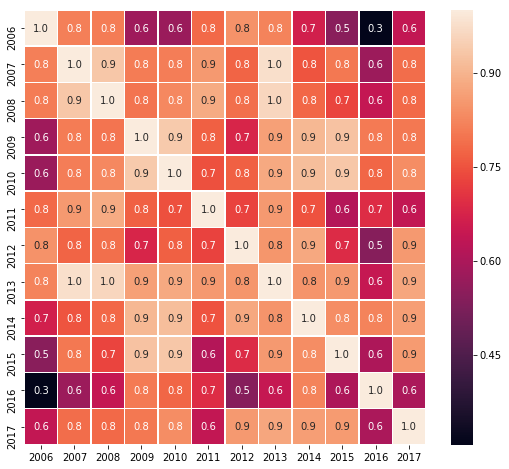

In [177]:
# Using Seaborn heatmap to plotting the correlation data to get a better visual on the graph
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(high.corr(), annot = True,linewidths=.4, fmt='.1f', ax=ax)
plt.show()

In [183]:
#Renaming 2013 column name
high.rename(columns={'2013': 'income13'}, inplace=True)

In [184]:
#Renaming 2015 column name
high.rename(columns={'2008': 'income8'}, inplace=True)

In [185]:
#Renaming 2009 column name
high.rename(columns={'2007': 'income7'}, inplace=True)

In [187]:
#Renaming 2009 column name
high.rename(columns={'2010': 'income10'}, inplace=True)

In [192]:
#Renaming 2009 column name
high.rename(columns={'2017': 'income17'}, inplace=True)

In [193]:
#Show the top 10 feature which have strongest correlation with SalePrice
corr_income = high.corr().income13
corr_high = corr_income.sort_values(ascending = False).head(10)
corr_high

income13    1.000000
income7     0.978017
income8     0.959866
income10    0.881669
income17    0.877690
income9     0.865999
2011        0.856035
incom15     0.853881
2012        0.848894
2014        0.848122
Name: income13, dtype: float64

In [189]:
high.columns

Index(['Cities', '2006', 'income7', 'income8', 'income9', 'income10', '2011',
       '2012', 'income13', '2014', 'incom15', '2016', '2017'],
      dtype='object')

In [37]:
#Show the top 10 feature which have strongest correlation with SalePrice
corr_income = high.corr().income13
corr_high = corr_income.sort_values(ascending = False).head(10)
corr_high

income13    1.000000
2007        0.977342
2008        0.971616
2010        0.917662
2011        0.904242
income9     0.901471
2017        0.894357
2014        0.890583
incom15     0.884091
2016        0.880603
Name: income13, dtype: float64

In [38]:
corr_high.head(2)

income13    1.000000
2007        0.977342
Name: income13, dtype: float64

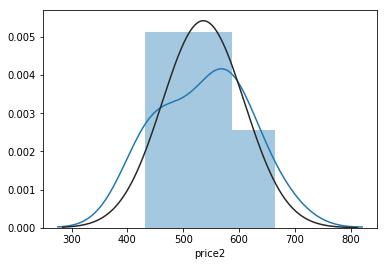

In [39]:
#histogram
sns.distplot(y,fit = norm);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % high['income13'].skew())
print("Kurtosis: %f" % high['income13'].kurt())

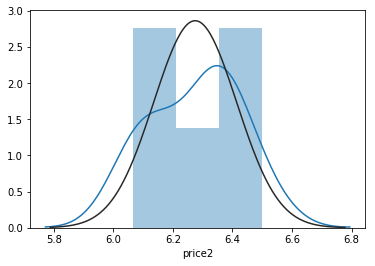

In [40]:
y_log = np.log(y)
sns.distplot(y_log,fit = norm);


 mu = 53120.00 and sigma = 8956.54



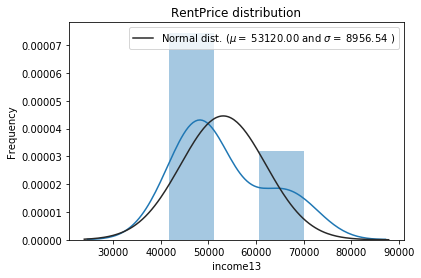

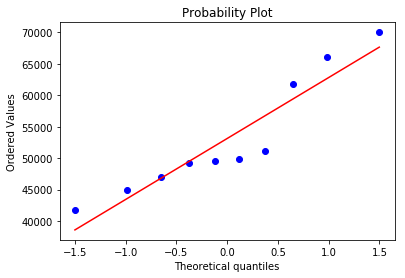

In [41]:
## let's do some analysis on this variable first.
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(high['income13'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(high['income13'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RentPrice distribution')

fig = plt.figure()
res = stats.probplot(high['income13'], plot=plt)
plt.show()

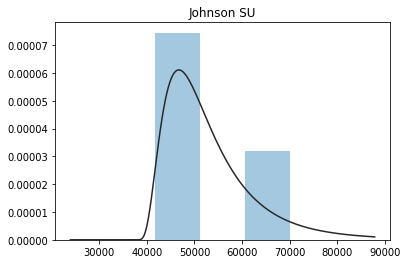

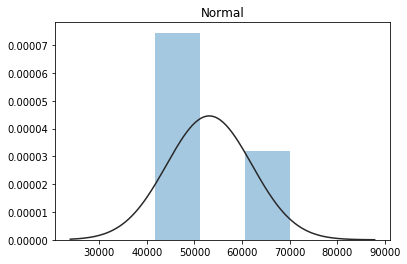

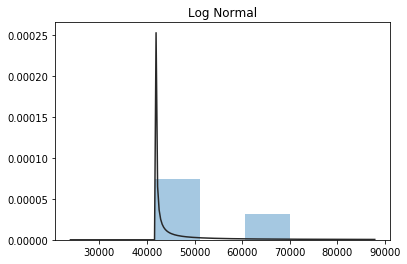

In [45]:
#  Johnson Su distribution plot for 2013

import scipy.stats as st
y = high[['income13']]
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

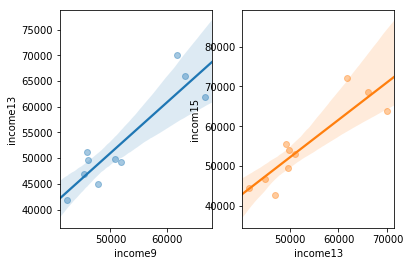

In [47]:
# Regression plot
fig, ax = plt.subplots(1,2)
sns.regplot('income9','income13',high, ax=ax[0], scatter_kws={'alpha':0.4})
sns.regplot('income13','incom15',high,ax=ax[1], scatter_kws={'alpha':0.4})


Text(0, 0.5, 'income13 residual')

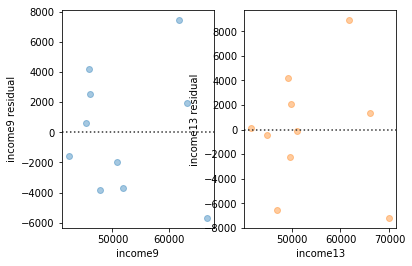

In [48]:
# visualizing the residuals by creating residual plots .
fig, ax = plt.subplots(1,2)
ax[0]= sns.residplot('income9','income13', high,ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('income9 residual')
ax[1]=sns.residplot('income13','incom15',high,ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('income13 residual')

In [288]:
# # Next we’ll want to fit a linear model.Create a fitted model.
import statsmodels.formula.api as smf
lm3 = smf.ols(formula='income8 ~ income10', data=high).fit()

# print the coefficients
lm3.params

Intercept    12608.045755
income10         0.770826
dtype: float64

In [290]:
# The P valus represents the probability that the coefficient is actually zero
#print the p-values for the model coefficients
lm3.pvalues

Intercept    0.206636
income10     0.003098
dtype: float64

In [289]:
# print the R-squared value for the model
lm3.rsquared

0.6854910493220028

In [291]:
# create a fitted model with all three features
lm4 = smf.ols(formula='income7 ~ income8 + income10 + income17', data=high).fit()

# print the coefficients
lm4.params


Intercept    9418.317847
income8         0.635990
income10        0.033458
income17        0.130803
dtype: float64

In [292]:
# # Next we’ll want to fit a linear regression model by adding a constant. 
X = high["income10"] ## X usually means our input variables (or independent variables)
y = high["income13"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
mdl2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = mdl2.predict(X)



C:\Users\susie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [200]:
# Next we’ll want to fit a linear regression model. We need to choose variables that we think we’ll be good predictors for the dependent variable.
# This can be done by checking the correlation(s) between variables, on what variables are good predictors of y.

import statsmodels.api as sm

X = high["income7"]
y = high["income8"]

# Note the difference in argument order
mdl = sm.OLS(y, X).fit()
predictions = mdl.predict(X) # make the predictions by the model



In [202]:
# set input and output variables to use in regression model
x = high[['income7', 'income8', 'income10','income13']]
y = high['income17']

# add intercept to input variable
x = sm.add_constant(x)

# fit regression model, using statsmodels GLM uses a different method but gives the same results
#model = sm.GLM(y, x, family=sm.families.Gaussian()).fit()
mdl3 = sm.OLS(y, x).fit()

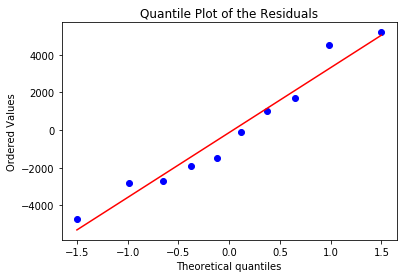

In [203]:
# quantile plot of residuals
stats.probplot(mdl.resid, plot=pylab)
_ = plt.title('Quantile Plot of the Residuals');

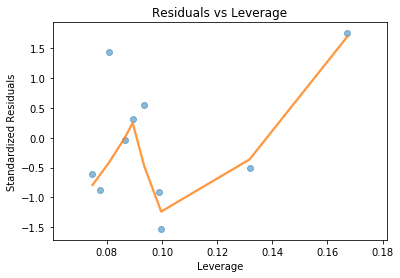

In [204]:
# normalized residuals
mdl_norm_residuals = mdl.get_influence().resid_studentized_internal
# leverage, from statsmodels internals
mdl_leverage = mdl.get_influence().hat_matrix_diag
plt.scatter(mdl_leverage, mdl_norm_residuals, alpha=0.5)
sns.regplot(mdl_leverage, mdl_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'C1', 'alpha': 0.8})
_ = plt.title('Residuals vs Leverage')
_ = plt.xlabel('Leverage')
_ = plt.ylabel('Standardized Residuals');

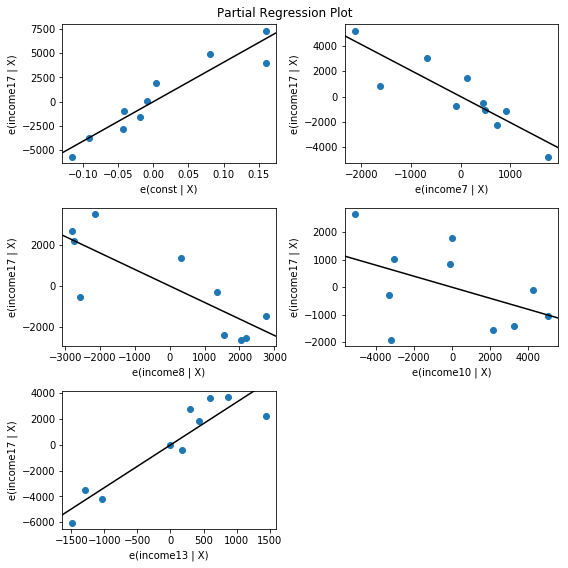

In [205]:
# model3 variable plots
fig = plt.figure(figsize=(8,8))
fig = sm.graphics.plot_partregress_grid(mdl3, fig=fig)

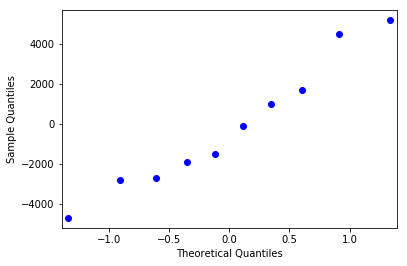

In [207]:
resd = mdl.resid # residuals
fig = sm.qqplot(resd)
plt.show()

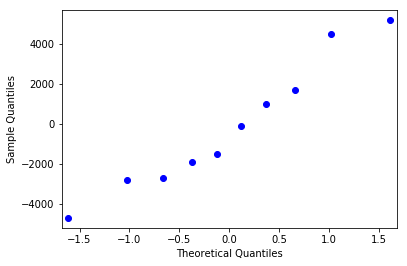

In [208]:
#qqplot of the residuals against quantiles of t-distribution with 4 degrees of freedom:
import scipy.stats as stats
fig = sm.qqplot(resd, stats.t, distargs=(4,))
plt.show()

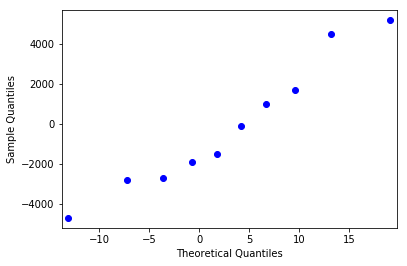

In [209]:
# qqplot against same as above, but with mean 3 and std 10:

fig = sm.qqplot(resd, stats.t, distargs=(4,), loc=3, scale=10)
plt.show()

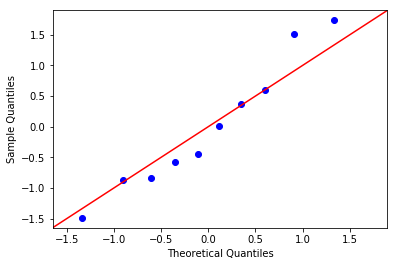

In [210]:
#Automatically determine parameters for t distribution including the loc and scale:

fig = sm.qqplot(resd, stats.t, fit=True, line='45')
plt.show()

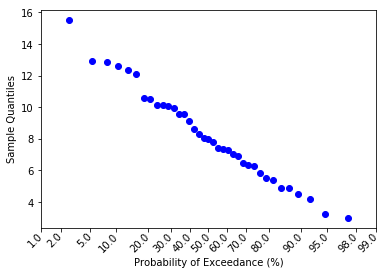

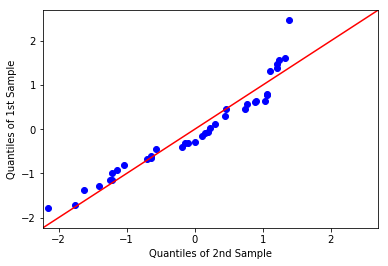

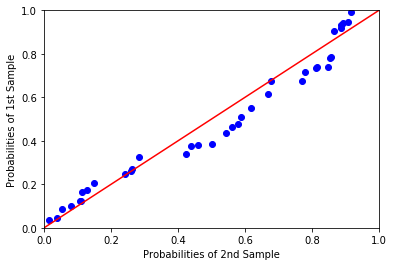

In [211]:
# ProbPlot class
x = np.random.normal(loc=8.25, scale=3.5, size=37)
y = np.random.normal(loc=8.00, scale=3.25, size=37)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)

# probability of exceedance
fig2 = pp_x.probplot(exceed=True)

# compare x quantiles to y quantiles
fig3 = pp_x.qqplot(other=pp_y, line='45')

# same as above with probabilities/percentiles
fig4 = pp_x.ppplot(other=pp_y, line='45')


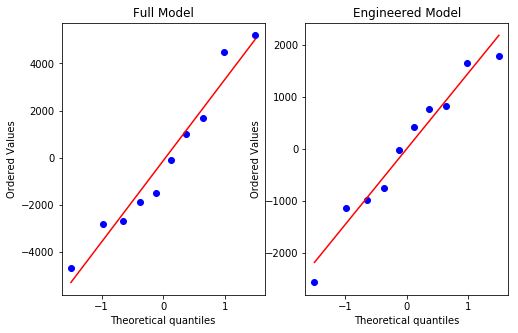

In [212]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
stats.probplot(mdl.resid, plot=pylab)
_ = plt.title('Full Model');

plt.subplot(1, 2, 2)
stats.probplot(mdl3.resid, plot=pylab)
_ = plt.title('Engineered Model');

In [293]:
# Print out the statistics
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                income8   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     17.44
Date:                Fri, 30 Aug 2019   Prob (F-statistic):            0.00310
Time:                        14:07:14   Log-Likelihood:                -98.292
No. Observations:                  10   AIC:                             200.6
Df Residuals:                       8   BIC:                             201.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.261e+04   9174.635      1.374      0.2

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [294]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                income7   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     14.72
Date:                Fri, 30 Aug 2019   Prob (F-statistic):            0.00357
Time:                        14:22:58   Log-Likelihood:                -91.244
No. Observations:                  10   AIC:                             190.5
Df Residuals:                       6   BIC:                             191.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9418.3178   8509.815      1.107      0.3

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [51]:
# Loading the monthly debt payments
market= pd.read_csv(r"C:\\Users\\susie\\Documents\\Data Science\\Capstone data\\Housing market indicators.csv"
                   ,encoding="latin1")

In [52]:
market.head(5)

,Indicators,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Single-detached,32425.0,26290.0,27868.0,26240.0,30036.0,20124.0,27019.0,35401.0,32737.0,...,37910.0,31108.0,22634.0,28089.0,26884.0,25567.0,23270.0,23691.0,24953.0,30079.0
1,Multiple,30224.0,26504.0,27904.0,18900.0,16609.0,15694.0,16043.0,18671.0,21093.0,...,30213.0,43968.0,27736.0,32344.0,40937.0,51175.0,37815.0,35443.0,45203.0,44873.0
2,Semi-detached,2338.0,1730.0,2611.0,2537.0,3421.0,2306.0,3348.0,4299.0,4575.0,...,4284.0,3415.0,3007.0,3006.0,3142.0,3397.0,3116.0,2742.0,2090.0,2375.0
3,Row,8462.0,9472.0,9246.0,7448.0,7226.0,6175.0,8124.0,9964.0,10073.0,...,11255.0,11212.0,7121.0,10255.0,9288.0,10577.0,9427.0,9975.0,10439.0,11676.0
4,Apartment,19424.0,15302.0,16047.0,8915.0,5962.0,7213.0,4571.0,4408.0,6445.0,...,14674.0,29341.0,17608.0,19083.0,28507.0,37201.0,25272.0,22726.0,32674.0,30822.0


In [53]:
# We have to sure we set the data up in order to be used in regression we’ll also need to deal with the null values.
# lets take a look at the null values
print(market.isnull().sum().to_string())

Indicators    0
1990          9
1991          8
1992          4
1993          4
1994          4
1995          4
1996          4
1997          4
1998          3
1999          3
2000          3
2001          3
2002          3
2003          3
2004          3
2005          2
2006          2
2007          2
2008          2
2009          1
2010          1
2011          1
2012          1
2013          1
2014          1
2015          1
2016          2


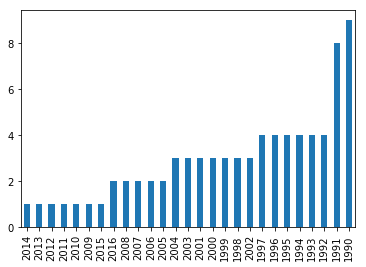

In [54]:
# Here we have a visual of the missing data
missing = market.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [56]:
# Using the n.smallest I will search the data to find the top 10 indicators that affects houssing cost.
low = market.nsmallest(10, ['1990','1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'])
low

,Indicators,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
19,New Housing Price Index % change,-1.330000,-10.700000,-3.21000,-1.710000,-0.280000,-0.020000,-1.010000,2.080000,2.500000,...,2.620000,3.510000,0.060000,2.430000,3.590000,4.110000,2.060000,1.710000,2.470000,4.890000
31,Employment (% change),-0.093768,-3.409135,-1.67844,0.105078,1.531143,1.722633,1.291011,2.416188,3.084520,...,1.443405,0.989871,-2.685851,1.634094,1.843628,0.663826,1.803538,0.797861,0.658026,1.103785
16,Rental vacancy rate %,1.400000,2.200000,2.60000,2.700000,2.400000,2.300000,3.000000,2.800000,2.600000,...,3.300000,2.700000,3.500000,2.900000,2.200000,2.500000,2.600000,2.300000,2.400000,2.100000
23,Rental accommodation costs % change,3.990000,3.420000,2.92000,2.590000,2.090000,1.740000,1.440000,1.490000,1.260000,...,0.980000,0.850000,1.070000,1.310000,1.030000,1.320000,1.690000,1.340000,1.100000,1.030000
20,Consumer Price Index % change,4.820000,4.640000,1.02000,1.780000,0.050000,2.470000,1.520000,1.880000,0.930000,...,1.830000,2.270000,0.380000,2.430000,3.080000,1.410000,1.050000,2.310000,1.220000,1.790000
32,Unemployment rate %,6.200000,9.500000,10.80000,10.900000,9.600000,8.700000,9.000000,8.400000,7.200000,...,6.400000,6.600000,9.100000,8.700000,7.900000,7.900000,7.600000,7.300000,6.800000,6.500000
22,Owned accommodation costs % change,6.630000,2.110000,-0.43000,-0.840000,-1.390000,1.460000,-0.830000,-0.780000,0.400000,...,3.240000,3.640000,1.750000,1.720000,1.620000,1.600000,0.520000,2.220000,2.650000,2.840000
30,Labour force participation rate %,69.541667,68.533333,67.35000,66.683333,65.916667,65.475000,65.541667,65.733333,65.933333,...,67.750000,67.716667,66.983333,66.850000,66.625000,66.158333,66.258333,65.841667,65.233333,64.991667
24,Bachelor,417.000000,443.000000,456.00000,470.000000,479.000000,490.000000,496.000000,507.000000,531.000000,...,668.000000,691.000000,688.000000,708.000000,741.000000,759.000000,785.000000,803.000000,840.000000,856.000000
25,One bedroom,508.000000,538.000000,557.00000,573.000000,586.000000,601.000000,609.000000,616.000000,645.000000,...,797.000000,820.000000,824.000000,844.000000,866.000000,893.000000,912.000000,937.000000,972.000000,995.000000


In [55]:
# Using the n.largest I will search the data to find the top 10 indicators that affects houssing cost.
top = market.nlargest(10, ['1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'])
top

,Indicators,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
11,Residential Building Permits,61578.000,60093.000,54272.000,45480.000,49404.000,38610.000,46437.000,61070.000,59675.000,...,73271.000,70031.000,57653.000,68703.000,65374.000,69884.000,70133.000,68800.000,73438.000,80503.000
10,Completions total,80562.000,59622.000,63134.000,51130.000,49106.000,36278.000,40729.000,51297.000,48403.000,...,64139.000,67737.000,54900.000,61867.000,60660.000,58331.000,59630.000,57077.000,74347.000,65926.000
5,Starts by intended market total,53341.000,46123.000,48693.000,38847.000,41560.000,31893.000,39512.000,49972.000,50088.000,...,62775.000,71923.000,47939.000,57104.000,65240.000,74414.000,58614.000,56162.000,68292.000,71863.000
1,Multiple,30224.000,26504.000,27904.000,18900.000,16609.000,15694.000,16043.000,18671.000,21093.000,...,30213.000,43968.000,27736.000,32344.000,40937.000,51175.000,37815.000,35443.000,45203.000,44873.000
0,Single-detached,32425.000,26290.000,27868.000,26240.000,30036.000,20124.000,27019.000,35401.000,32737.000,...,37910.000,31108.000,22634.000,28089.000,26884.000,25567.000,23270.000,23691.000,24953.000,30079.000
6,Homeownership freehold,28104.000,24813.000,27917.000,26332.000,32516.000,22685.000,31634.000,40925.000,39649.000,...,45626.000,38613.000,28460.000,35650.000,35466.000,34888.000,31299.000,31064.000,33729.000,39148.000
4,Apartment,19424.000,15302.000,16047.000,8915.000,5962.000,7213.000,4571.000,4408.000,6445.000,...,14674.000,29341.000,17608.000,19083.000,28507.000,37201.000,25272.000,22726.000,32674.000,30822.000
7,Rental,12158.000,14519.000,13798.000,7974.000,4148.000,2884.000,1289.000,790.000,1181.000,...,2994.000,3867.000,4811.000,3743.000,4785.000,4891.000,3888.000,5053.000,6644.000,7367.000
29,Population on July 1 (thousands),10295.832,10431.316,10572.205,10690.038,10819.146,10950.119,11082.903,11227.651,11365.901,...,12764.195,12882.625,12997.687,13135.063,13263.544,13413.702,13556.229,13685.171,13797.038,13982.984
3,Row,8462.000,9472.000,9246.000,7448.000,7226.000,6175.000,8124.000,9964.000,10073.000,...,11255.000,11212.000,7121.000,10255.000,9288.000,10577.000,9427.000,9975.000,10439.000,11676.000
